<a href="https://www.kaggle.com/code/furkanuysl/digit-recognizer-cnn-99?scriptVersionId=92543727" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # Linear algebra
import pandas as pd # Data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading train data
train = pd.read_csv("../input/digit-recognizer/train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Loading test data
test= pd.read_csv("../input/digit-recognizer/test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# put labels into y_train variable
Y_train = train["label"]
# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

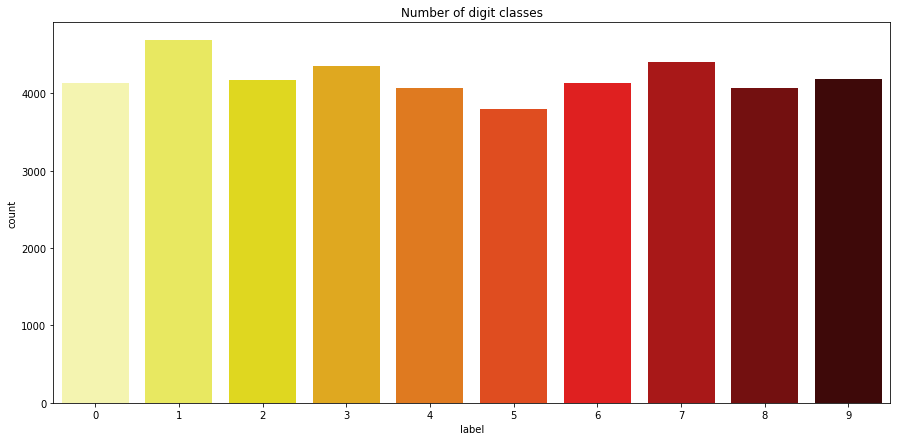

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
# Visualize number of digits classes
plt.figure(figsize=(15,7))
sns.countplot(Y_train, palette="hot_r")
plt.title("Number of digit classes")
Y_train.value_counts()

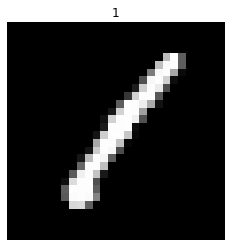

In [6]:
# Plot a sample
img = X_train.iloc[0].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

In [7]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)


x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [8]:
# Reshape /  28 pixels x 28 pixels x 1 pixel (gray scale)
# Dimension = height x width x channel
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [9]:
# Convert to one-hot-encoding
from keras.utils.np_utils import to_categorical 
Y_train = to_categorical(Y_train, num_classes = 10)

In [10]:
# Split the data into train and validation
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


In [11]:
# Define the model
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


model = Sequential()
#
model.add(Conv2D(filters = 16, kernel_size = (4,4),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(1,1)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 32, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(1,1)))
model.add(Dropout(0.25))

# Fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [12]:
epochs = 100
batch_size = 250

In [13]:
# Data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False, 
        featurewise_std_normalization=False, 
        samplewise_std_normalization=False,  
        zca_whitening=False,
        rotation_range=5,  
        zoom_range = 0.1,
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=False, 
        vertical_flip=False)  

datagen.fit(X_train)

In [14]:
# Fit the model
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)



history = model.fit(datagen.flow(X_train,Y_train, batch_size=batch_size),
                            epochs = epochs, validation_data = (X_val,Y_val),
                            steps_per_epoch=X_train.shape[0] // batch_size,
                            callbacks =[earlystopping])

Epoch 1/100
151/151 [==============================] - 18s 113ms/step - loss: 1.7951 - accuracy: 0.3489 - val_loss: 0.2129 - val_accuracy: 0.9445
Epoch 2/100
151/151 [==============================] - 17s 111ms/step - loss: 0.5962 - accuracy: 0.8173 - val_loss: 0.1171 - val_accuracy: 0.9652
Epoch 3/100
151/151 [==============================] - 16s 108ms/step - loss: 0.4029 - accuracy: 0.8844 - val_loss: 0.0867 - val_accuracy: 0.9738
Epoch 4/100
151/151 [==============================] - 17s 112ms/step - loss: 0.3181 - accuracy: 0.9100 - val_loss: 0.0749 - val_accuracy: 0.9774
Epoch 5/100
151/151 [==============================] - 17s 109ms/step - loss: 0.2964 - accuracy: 0.9183 - val_loss: 0.0718 - val_accuracy: 0.9783
Epoch 6/100
151/151 [==============================] - 17s 111ms/step - loss: 0.2559 - accuracy: 0.9286 - val_loss: 0.0611 - val_accuracy: 0.9826
Epoch 7/100
151/151 [==============================] - 16s 108ms/step - loss: 0.2352 - accuracy: 0.9367 - val_loss: 0.0598 -


Accuracy Score :  0.9897619047619047 



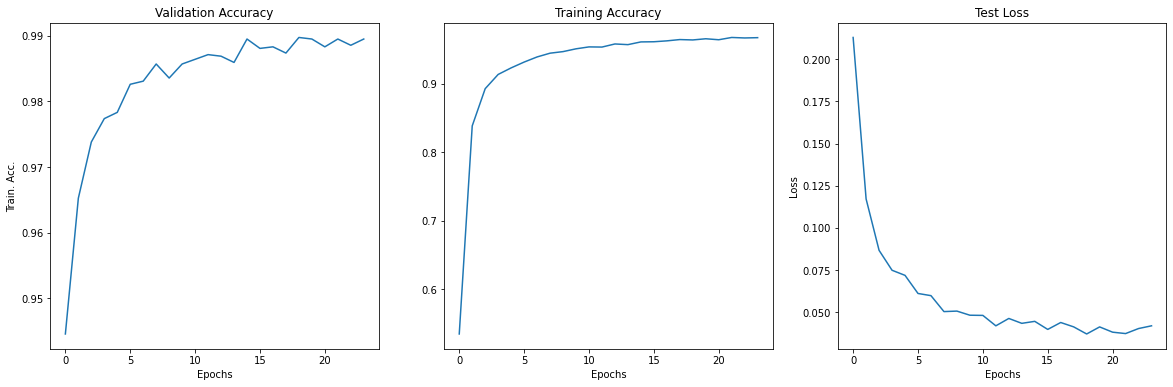

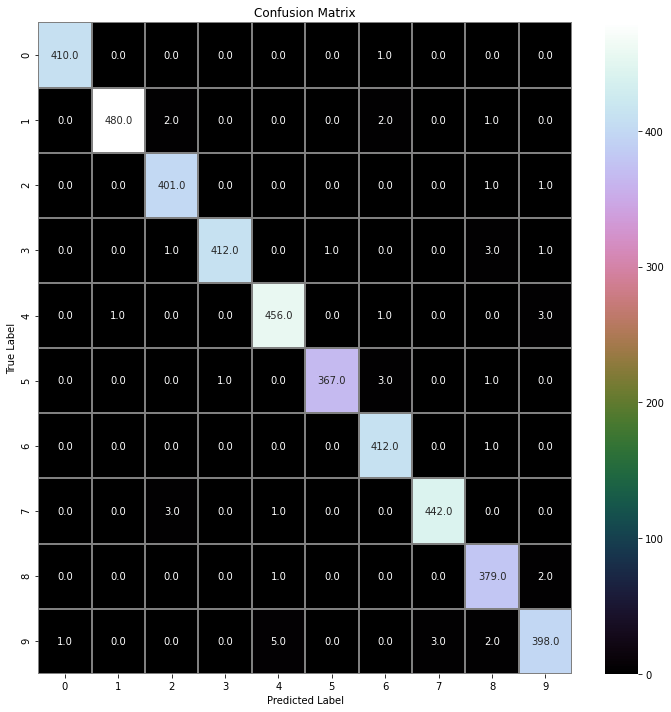

In [15]:
# evaluate the model
from sklearn import metrics

Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# Compute the confusion matrix

print("\n""Accuracy Score : ",metrics.accuracy_score(Y_true, Y_pred_classes),"\n")

fig, axis = plt.subplots(1, 3, figsize=(20,6))
axis[0].plot(history.history['val_accuracy'], label='val_acc')
axis[0].set_title("Validation Accuracy")
axis[0].set_xlabel("Epochs")
axis[0].set_ylabel("Val. Acc.")
axis[1].plot(history.history['accuracy'], label='acc')
axis[1].set_title("Training Accuracy")
axis[1].set_xlabel("Epochs")
axis[0].set_ylabel("Train. Acc.")
axis[2].plot(history.history['val_loss'], label='val_loss')
axis[2].set_title("Test Loss")
axis[2].set_xlabel("Epochs")
axis[2].set_ylabel("Loss")

plt.show()

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# Plot the confusion matrix
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="cubehelix",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()

plt.show()

In [16]:
# Make prediction on real test data
y_pred_test = model.predict(test)
prediction = np.argmax(y_pred_test, axis = 1)

# create submission DataFrame
submission = pd.DataFrame({'ImageId' : range(1,28001), 'Label' : list(prediction)})
submission.head(10)
submission.shape

(28000, 2)

1    3187
7    2883
2    2817
3    2790
4    2785
6    2781
9    2761
8    2755
0    2752
5    2489
dtype: int64

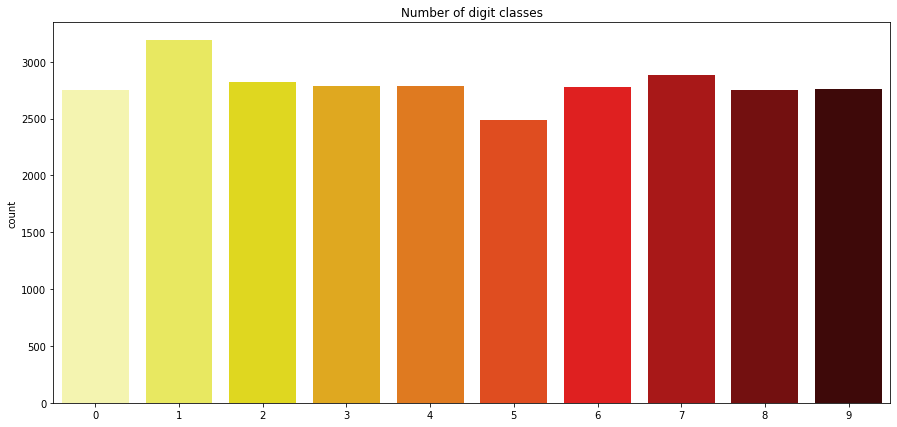

In [17]:
# Visualize number of digits classes of submission dataset
plt.figure(figsize=(15,7))
sns.countplot(prediction, palette="hot_r")
plt.title("Number of digit classes")
df = pd.DataFrame(prediction)
df.value_counts()

In [18]:
# Create CSV-file
submission.to_csv("submission.csv",index=False)